In [20]:
import torch

In [21]:
z = torch.zeros(5, 3)  # make 5x3 tensor filled 0
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [22]:
i = torch.ones((5, 3), dtype=torch.int16)  # make 5x3 tensor filled 1 dtype = int16
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [23]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)  # 2x2 tensor filled random
print('랜덤 tensor 값:')
print(r1)

r2 = torch.rand(2, 2)  # 2x2 tensor filled random
print('\n다른 랜덤 tensor 값:')
print(r2) # 새로운 2x2 행렬 값

torch.manual_seed(1729)  # seed 고정
r3 = torch.rand(2, 2) # == r1
print('\nr1과 일치:')
print(r3) # == r1

랜덤 tensor 값:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [24]:
ones = torch.ones(2, 3) # 2x3 tensor filled 1
print(ones)

twos = torch.ones(2, 3) * 2  # 2x3 tensor filled 2
print(twos)

threes = ones + twos       # shape이 같아서 더할 수 있다.
print(threes)              # tensor의 원소별 더한 값이 결과로 나옵니다. (element wise)
print(threes.shape)        # 입력 tensor와 동일한 차원을 가지고 있습니다.

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# 런타임 오류를 발생시키려면 아래 줄의 주석을 해제합니다.
# r3 = r1 + r2 # shape이 다르다.

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [25]:
# torch.rand() = [0,1) 사이로 채워짐.
r = (torch.rand(2, 2) - 0.5) * 2 # -1과 1 사이의 값을 가집니다.
print('랜덤 행렬값, r:')
print(r)

# 일반적인 수학적 연산은 다음과 같이 지원됩니다:
print('\nr의 절대값:')
print(torch.abs(r))

# 삼각함수를 사용할 수 있습니다:
print('\nr의 역 사인 함수:')
print(torch.asin(r))

# 행렬식 및 특이값 분해와 같은 선형 대수 연산을 사용할 수 있습니다.
print('\nr의 행렬식:')
print(torch.det(r))
print('\nr의 특이값 분해:')
print(torch.svd(r))

# 통계 및 집합 연산 등을 사용할 수 있습니다:
print('\nr의 평균 및 표준편차:')
print(torch.std_mean(r))
print('\nr의 최대값:')
print(torch.max(r))

랜덤 행렬값, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

r의 절대값:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

r의 역 사인 함수:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

r의 행렬식:
tensor(-0.5703)

r의 특이값 분해:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

r의 평균 및 표준편차:
(tensor(0.7217), tensor(0.1247))

r의 최대값:
tensor(0.9956)


In [26]:
import torch                     # PyTorch 모든 모듈 가져오기
import torch.nn as nn            # torch.nn.Module의 경우 PyTorch model의 부모 객체
import torch.nn.functional as F  # 활성화 함수 모듈 가져오기

In [27]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 입력 이미지 채널, 6개의 output 채널, 3x3 정방 합성곱 커널을 사용합니다.
        '''
        torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, 
                        dilation=1, groups=1, bias=True, padding_mode='zeros',
                        device=None, dtype=None)
        '''
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # 아핀 변환: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 이미지 차원, linear을 차원이 1차원 이여야 함. (input, output))
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x): 
        # 실제 계산
        # 최대 풀링은 (2, 2) 윈도우 크기를 사용합니다.
        # 활성화 함수 : relu
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있습니다.
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # contiguous해야 사용 가능.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [28]:
net = LeNet()
print(net)                         # 인스턴스한 객체를 출력하면 어떤 값을 보여줄까요?

input = torch.rand(1, 1, 32, 32)   # 32x32 크기의 1채널의 흑백 이미지를 만듭니다.
print(input)
print('\n이미지 배치 shape:')
print(input.shape)

output = net(input)                # 객체로부터 직접 forward() 함수를 호출하지 않습니다.
print('\n:결과 값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
tensor([[[[0.4734, 0.8919, 0.8654,  ..., 0.4020, 0.8537, 0.4461],
          [0.2797, 0.3463, 0.0821,  ..., 0.2289, 0.3642, 0.6232],
          [0.2572, 0.8885, 0.1241,  ..., 0.7137, 0.6651, 0.3160],
          ...,
          [0.2146, 0.9251, 0.8576,  ..., 0.7958, 0.5860, 0.7980],
          [0.4936, 0.9820, 0.5559,  ..., 0.2232, 0.2553, 0.3086],
          [0.8238, 0.5991, 0.6750,  ..., 0.7459, 0.1907, 0.9932]]]])

이미지 배치 shape:
torch.Size([1, 1, 32, 32])

:결과 값
tensor([[ 0.0639, -0.0646, -0.0593, -0.0054, -0.0212, -0.0529, -0.1144,  0.0339,
          0.0838,  0.0405]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(  # 데이터 핸들링을 여러단계로 묶기. 
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 평균이 0이고 표준 편차가 0.5가 되도록 tensor의 값을 조정합니다. 
# 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화하여 학습 속도를 높일 수 있습니다.

In [30]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [31]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

 ship truck   cat  bird


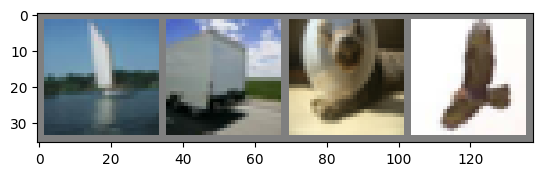

In [32]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [33]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 bird plane horse   car


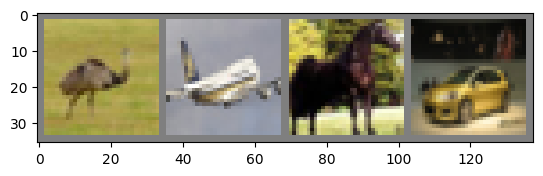

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수입니다.


def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [37]:
#LOSS
criterion = nn.CrossEntropyLoss()

#옵티마이저
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [38]:
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받습니다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정합니다
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()# 기울기 반영

        # epoch 및 loss 값을 출력합니다
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력합니다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.174
[1,  4000] loss: 1.812
[1,  6000] loss: 1.673
[1,  8000] loss: 1.598
[1, 10000] loss: 1.541
[1, 12000] loss: 1.475
[2,  2000] loss: 1.397
[2,  4000] loss: 1.368
[2,  6000] loss: 1.337
[2,  8000] loss: 1.323
[2, 10000] loss: 1.301
[2, 12000] loss: 1.275
Finished Training


In [39]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%' % (
    100 * correct / total))

10000개 테스트 이미지에서 모델 정확도: 55 %
